<h1>Evaluation of different Stable Distribution Fitting Methods</h1>

This notebook evaluates various methods for fitting stable distributions to data, including the Quantile Method, Log-Moments Method, Tail-Regression Method and Maximum Likelihood implemented in R. Synthetic data from a known stable distribution will be generated to assess the accuracy of each fitting method. Specifically, 100 values within the rainge of α (0 < α ≤ 2) will be tested to compare the estimated parameters of each method against the true values.

In [1]:
import numpy as np
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri, numpy2ri, default_converter
import rpy2.robjects as ro
import pandas as pd
from scipy.stats import norm, levy_stable
import matplotlib.pyplot as plt
import seaborn as sns
import optim.stable_estimators as se
from tqdm import tqdm

ro.r('.libPaths("/Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/library")')

Set up simulation: generate 1000 samples from stable distribution with fixed beta, gamma, delta and varying alpha in the range mentioned above. Then fit the data using the different methods and store the estimated alpha values for comparison in a pandas DataFrame.

In [ ]:
n_samples = 10000

alphas = np.linspace(0.1, 2.0, 100)

beta = 1
gamma = 1.0
delta = 0.0

<Axes: ylabel='Density'>

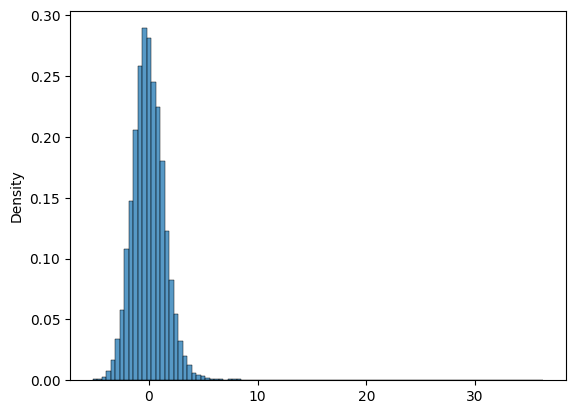

In [23]:
data = levy_stable.rvs(1.9, beta, loc=delta, scale=gamma, size=n_samples)
sns.histplot(data, bins=100, stat='density')

In [24]:
df_results = pd.DataFrame(columns=[
    "alpha_true", "alpha_ml", "alpha_quantile", "alpha_logmom", "alpha_tail"
])

In [25]:
for i, alpha_val in enumerate(tqdm(alphas, desc="Estimating alpha")):
    # Generate data
    data = levy_stable.rvs(alpha_val, beta, loc=delta, scale=gamma, size=n_samples)
    
    # Fit using different methods
    try: 
        alpha_ml = se.maximum_likelihood_estimator(data)["alpha"]
    except Exception as e:
        alpha_ml = np.nan
    alpha_quantile = se.alpha_quantile_method(data)
    alpha_logmom = se.alpha_log_moments(data)
    alpha_tail = se.alpha_tail_regression(data)

    # Store results
    df_results.loc[i] = [
        alpha_val, alpha_ml, alpha_quantile, alpha_logmom, alpha_tail
    ]


Estimating alpha:  15%|█▌        | 15/100 [00:00<00:02, 35.92it/s]R callback write-console: Fehler in v[[1]] : Indizierung außerhalb der Grenzen
  
R callback write-console: Fehler in v[[1]] : Indizierung außerhalb der Grenzen
  
R callback write-console: Fehler in v[[1]] : Indizierung außerhalb der Grenzen
  
Estimating alpha: 100%|██████████| 100/100 [00:01<00:00, 50.63it/s]


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


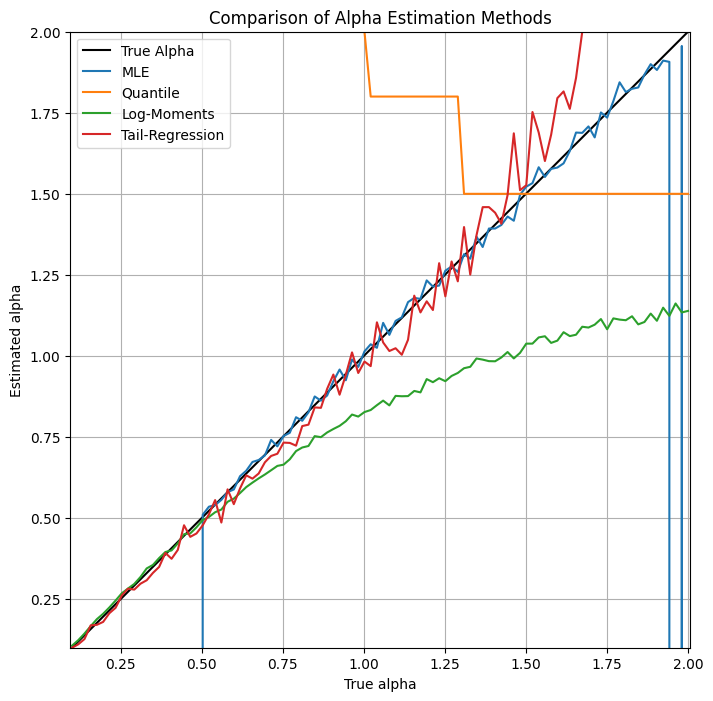

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))

plt.plot(df_results['alpha_true'], df_results['alpha_true'], 'k-', label='True Alpha')

plt.plot(df_results['alpha_true'], df_results['alpha_ml'], label='MLE')
plt.plot(df_results['alpha_true'], df_results['alpha_quantile'], label='Quantile')
plt.plot(df_results['alpha_true'], df_results['alpha_logmom'], label='Log-Moments')
plt.plot(df_results['alpha_true'], df_results['alpha_tail'], label='Tail-Regression')

plt.xlabel('True alpha')
plt.ylabel('Estimated alpha')
plt.title('Comparison of Alpha Estimation Methods')
plt.legend()
plt.grid(True)

plt.axis('equal')
plt.xlim(df_results['alpha_true'].min(), df_results['alpha_true'].max())
plt.ylim(df_results['alpha_true'].min(), df_results['alpha_true'].max())

plt.show()


<h2> Set up for beta, gamma and delta parameter grid </h2>

In [ ]:
alpha_grid = np.linspace(0.1, 2.0, 100)
beta_grid  = np.linspace(-1, 1, 5)
gamma_grid = np.linspace(0.5, 2.0, 5)
delta_grid = np.linspace(-1, 1, 5)

In [68]:
columns = ['alpha_true', 'beta', 'gamma', 'delta', 'alpha_ml', 
           'alpha_quantile', 'alpha_logmom', 'alpha_tail']
df_results = pd.DataFrame(columns=columns)

In [71]:
for beta in tqdm(beta_grid, desc="Beta"):
    for gamma in tqdm(gamma_grid, desc="Gamma", leave=False):
        for delta in tqdm(delta_grid, desc="Delta", leave=False):
            for alpha_true in alpha_grid:
                
                # generate data
                data = levy_stable.rvs(alpha_true, beta, loc=delta, scale=gamma, size=n_samples)
                
                try: 
                    alpha_ml = se.maximum_likelihood_estimator(data)["alpha"]
                except Exception as e:
                    alpha_ml = np.nan
                alpha_quantile = se.alpha_quantile_method(data)
                alpha_logmom = se.alpha_log_moments(data)
                alpha_tail = se.alpha_tail_regression(data)
                
                # store results
                df_results = pd.concat([df_results, pd.DataFrame([[
                    alpha_true, beta, gamma, delta, alpha_ml, alpha_quantile, alpha_logmom, alpha_tail
                ]], columns=columns)], ignore_index=True)

Beta:   0%|          | 0/5 [00:00<?, ?it/s]
R callback write-console: Fehler in v[[1]] : Indizierung außerhalb der Grenzen
  
R callback write-console: Fehler in v[[1]] : Indizierung außerhalb der Grenzen
  
R callback write-console: Fehler in v[[1]] : Indizierung außerhalb der Grenzen
  

R callback write-console: Fehler in v[[1]] : Indizierung außerhalb der Grenzen
  
R callback write-console: Fehler in v[[1]] : Indizierung außerhalb der Grenzen
  
R callback write-console: Fehler in v[[1]] : Indizierung außerhalb der Grenzen
  

R callback write-console: Fehler in v[[1]] : Indizierung außerhalb der Grenzen
  
R callback write-console: Fehler in v[[1]] : Indizierung außerhalb der Grenzen
  
R callback write-console: Fehler in v[[1]] : Indizierung außerhalb der Grenzen
  

R callback write-console: Fehler in v[[1]] : Indizierung außerhalb der Grenzen
  
R callback write-console: Fehler in v[[1]] : Indizierung außerhalb der Grenzen
  
R callback write-console: Fehler in v[[1]] : Indizi

In [ ]:
# load result dataframe (previously stored as pickele)

import pickle
with open('stable_fitting_results.pkl', 'rb') as f:
    df_results = pickle.load(f)

In [17]:
subset = df_results[(df_results['beta'] == 0.5) & (df_results['gamma'] == 0.5) & (df_results['delta'] == 0)]

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


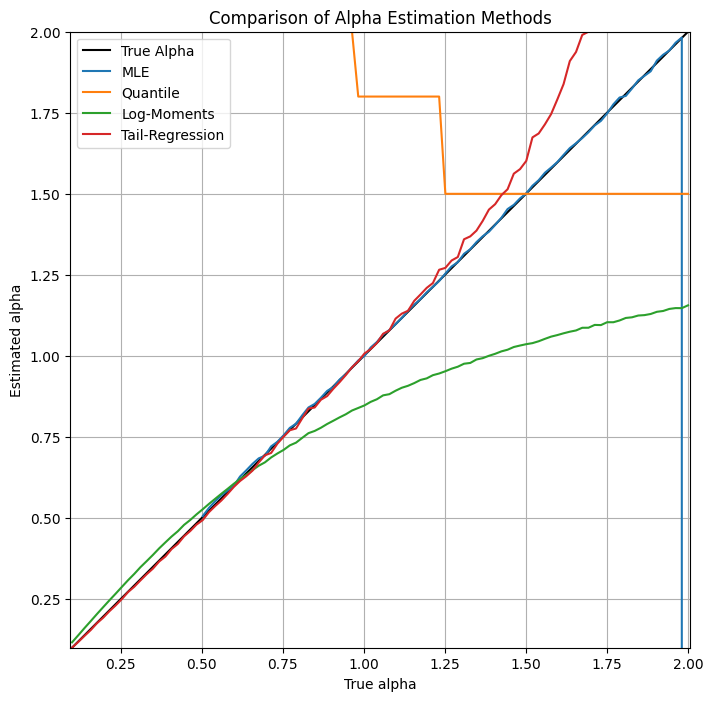

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))

plt.plot(subset['alpha_true'], subset['alpha_true'], 'k-', label='True Alpha')

plt.plot(subset['alpha_true'], subset['alpha_ml'], label='MLE')
plt.plot(subset['alpha_true'], subset['alpha_quantile'], label='Quantile')
plt.plot(subset['alpha_true'], subset['alpha_logmom'], label='Log-Moments')
plt.plot(subset['alpha_true'], subset['alpha_tail'], label='Tail-Regression')

plt.xlabel('True alpha')
plt.ylabel('Estimated alpha')
plt.title('Comparison of Alpha Estimation Methods')
plt.legend()
plt.grid(True)


plt.axis('equal')
plt.xlim(subset['alpha_true'].min(), subset['alpha_true'].max())
plt.ylim(subset['alpha_true'].min(), subset['alpha_true'].max())

plt.show()
